In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv(r'C:\Users\aacjp\OneDrive\Desktop\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Filling in NAN values

In [2]:
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Modifying rennovation and basement features
yrs_ago will represent how many years ago the home was last renovated. If the home hasn't been rennovated this will be how many years ago the home was built. The basement variable will be converted to a 1 or zero because not all homes have a basemtnt.

In [3]:
last_built = []
dates = []
csf = []
for i in range(len(df)):
    if df['yr_built'][i] > df['yr_renovated'][i]:
        last_built.append(int(2020 - df['yr_built'][i]))
    else:
        last_built.append(int(2020 - df['yr_renovated'][i]))
    dates.append(int(df['date'][i][-4:]))
    if df['sqft_basement'][i] == '?':
        floaty = 0.0
    else:
        floaty = float(df['sqft_basement'][i])
    csf.append(df['sqft_living'][i] + floaty)

In [4]:
bsmt = []
counter = 0
cntr2 = 0
cntr = 0
for i in range(len(df)):
    if len(df['sqft_basement'][i]) > 3:
        bsmt.append(1)
    else:
        bsmt.append(0)

In [5]:
df['yrs_ago'] = last_built
df['yr_sold'] = dates
df['combined_sf'] = csf
df['has_basement'] = bsmt
df2 = df.drop(['date', 'id', 'yr_renovated', 'sqft_basement', 'view'], axis='columns')

# Checking for multicollinearity
more on this in model.ipynb

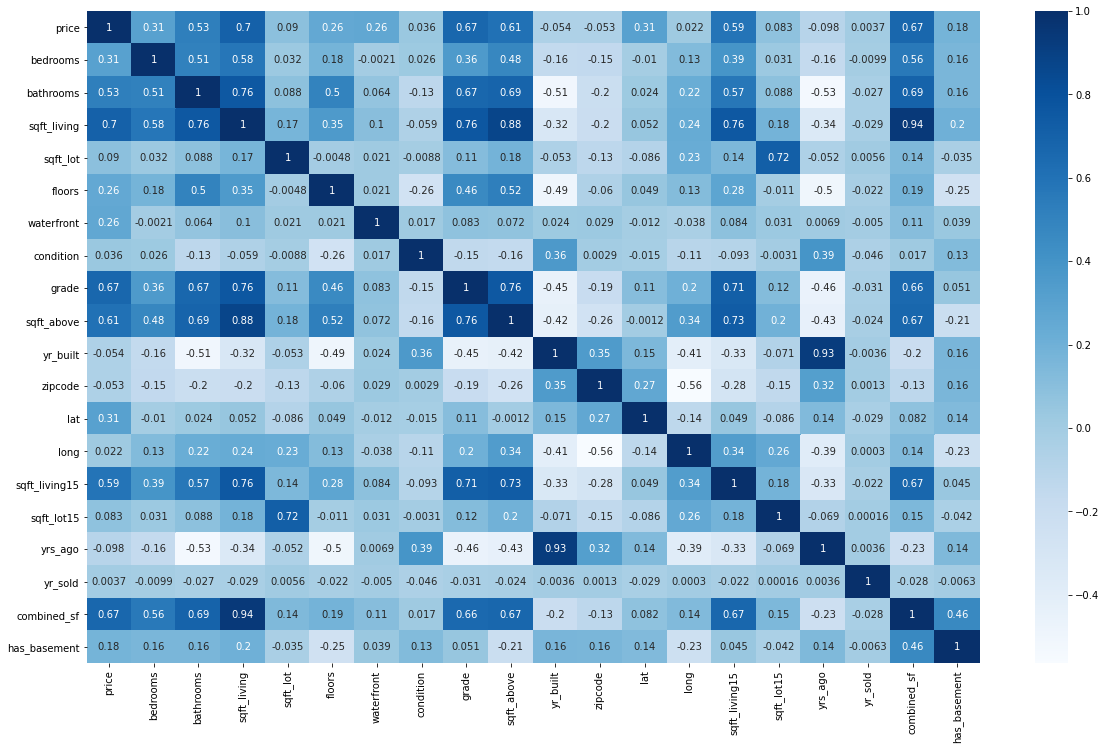

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(), annot=True, cmap='Blues');

# Modifying lattitude, longitude, and year built to give it more signifigance
I'll represent lattitude and longitude by the decimal points after the whole numbber (ie. 0.276 rather than 47.276). I will also convert year built to years ago it was built, using year built houses are at most 5% apart and if this variable is important we're unlikley to find out.

In [11]:
sla = []
slo = []
syb = []
for i in range(len(df)):
    sla.append(df2['lat'][i] - 47)
    slo.append(df2['long'][i] + 122)
    syb.append(2020 - df2['yr_built'][i])
    
df2['lat'] = sla
df2['long'] = slo
df2['yr_built'] = syb

1. bathrooms and sqft_living
2. bathrooms and combined_sf
3. bathrooms and grade
4. bathrooms and sqft_above
5. grade and sqft_living
6. sqft_above and sqft_living
7. sqft_lot and sqft_lot15

dropping: all things sf except for lot because of multicolinearity

# Dropping multicolinear features

In [12]:
df3 = df2.drop(['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'combined_sf'], axis='columns')

In [13]:
df3.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,yrs_ago,yr_sold,has_basement
0,221900.0,3,1.00,5650,1.0,0.0,3,7,1955,98178,-46.4888,121.743,65,2014,0
1,538000.0,3,2.25,7242,2.0,0.0,3,7,1951,98125,-46.2790,121.681,29,2014,1
2,180000.0,2,1.00,10000,1.0,0.0,3,6,1933,98028,-46.2621,121.767,87,2015,0
3,604000.0,4,3.00,5000,1.0,0.0,5,7,1965,98136,-46.4792,121.607,55,2014,1
4,510000.0,3,2.00,8080,1.0,0.0,3,8,1987,98074,-46.3832,121.955,33,2015,0


# 1. How does bathroom to bedroom ratio affect price?

Conclusion: According to the Linear Regression model house price is expected to increase by 488537
for every bathroom there is for each bedroom. what this means is that, based only on this metric, a house with 2 beds and 4 baths would be 1204752 because 488537 x 2 + 227679 (y-intercept) = 1204752

Reccomendation/Insight: houses with more bathrooms than bedrooms cost significantly more than houses with as many or fewer bathrooms than bedrooms.

In [35]:
b2b_ratio = []
for i in range(len(df3)):
    b2b_ratio.append(round(df3['bathrooms'][i] / df3['bedrooms'][i] , 2))
    
df3['b2b_ratio'] = b2b_ratio    
X = pd.DataFrame(b2b_ratio)
X.columns = ['Bathroom to Bedroom Ratio']
y = pd.DataFrame(df3['price'])
y.columns = ['Price in Millions']
ratios = pd.concat([X, y], axis='columns')
ratios

,Bathroom to Bedroom Ratio,Price in Millions
0,0.33,221900.0
1,0.75,538000.0
2,0.50,180000.0
3,0.75,604000.0
4,0.67,510000.0
...,...,...
21592,0.83,360000.0
21593,0.62,400000.0
21594,0.38,402101.0
21595,0.83,400000.0


C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


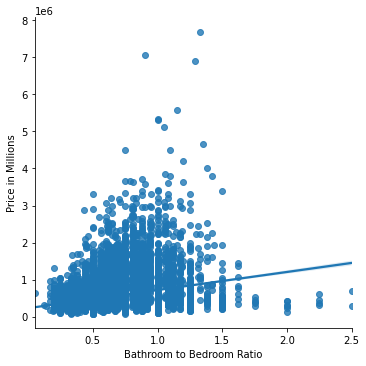

In [36]:
from matplotlib import pyplot as plt
sns.lmplot('Bathroom to Bedroom Ratio', 'Price in Millions', ratios)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
round(model.coef_[0])

488537

In [17]:
np.round(model.predict([[2]]))

array([1204752.])

In [18]:
round(model.intercept_)

227679

# 2. What effect does housing condition have on sale price, how does this compare to houses with a waterfront view?

conclusion: a higher condition index leads to higher prices, seeing the biggest jump from 2/5 to 3/5. however fro houses with waterfront the correlation is mostly negative with the exception of the increase from 1 to 2.

reccomendation: taking the effort to improve the quality of your home is generally worth the effort, especially if your house is currently a 2 or 4. If at all possible you should find out what it's condition is if you want to sell your home at the highest price. But be careful, because the cost of improving the quality may exceed the gains on the sale. Odly enough the findings are quite different for homes with waterfront, however 'fixer upper' homes on the waterfront may be a good investment opportunity.

In [19]:
waterfront_properties = df3.loc[df3['waterfront'] == 1.0]

In [20]:
ix_arr = np.unique(df3['condition'])
avg_prices = {}
avg_prices_waterfront = {}
for i in range(len(ix_arr)):
    avg_prices[ix_arr[i]] = np.mean(df3.loc[df3['condition'] == ix_arr[i]]['price'])
    avg_prices_waterfront[ix_arr[i]] = np.mean(waterfront_properties.loc[waterfront_properties['condition'] == ix_arr[i]]['price'])
    
print(f'All homes: {avg_prices}')
print(f'Homes with waterfront: {avg_prices_waterfront}')

All homes: {1: 341067.2413793103, 2: 328178.7588235294, 3: 542173.0573466476, 4: 521374.450413951, 5: 612577.7425044092}
Homes with waterfront: {1: 658000.0, 2: 2560000.0, 3: 1802661.875, 4: 1579260.8695652173, 5: 1702022.2222222222}


C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


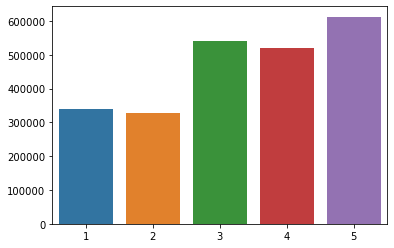

In [24]:
y = list(avg_prices.values())
x = list(avg_prices.keys())
sns.barplot(x, y);

C:\Users\aacjp\Anaconda3\envs\flatiron-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


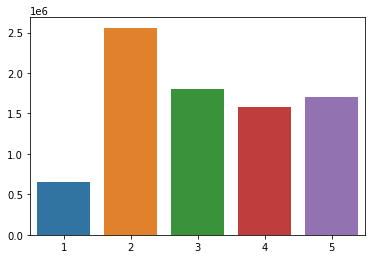

In [25]:
y = list(avg_prices_waterfront.values())
x = list(avg_prices_waterfront.keys())
sns.barplot(x, y);

# 3. In which zip code are houses the oldest on average and what is the average price? What about the newest?

conclusion: the 98105 zipcode which consists mainly of the Lauel Hurst neigborhood near the University of Washington is the 
oldest with the average house being built in 1940. In contrast, the 98053 zipcode in the eastern part of Richmond, WAis the newest with the average house being built in 1998. The average house in 98105 is 863229 and the average house in 98053 is slightly cheaper at $677215. In general, houses that are further east or inland are newer on average, however price is not much different.

reccomendations: If you are looking to save, it is best to avoid homes built before 1960 and historic neighborhoods. Homes further inland are also cheaper on average, if you like being closer to mountains this is could work out well for you.

In [19]:
ziparr = np.unique(df3['zipcode'])
avg_yr = {}
pbz = []
for i in range(len(ziparr)):
    pbz.append(np.mean(df3.loc[df['zipcode'] == ziparr[i]]['price']))
    avg_yr[round(np.mean(df3.loc[df['zipcode'] == ziparr[i]]['yr_built']))] = ziparr[i]

In [20]:
avg_yr[max(avg_yr.keys())], max(avg_yr.keys())

(98105, 80)

In [21]:
avg_yr[min(avg_yr.keys())], min(avg_yr.keys())

(98053, 22)

In [22]:
round(np.mean(df3.loc[df3['zipcode'] == 98105]['price']))

863229

In [23]:
round(np.mean(df3.loc[df3['zipcode'] == 98053]['price']))

677215

# Finding average price, house age, and longitude by zip code

In [24]:
pbz = []
ybz = []
lobz = []
for i in range(len(avg_yr)):
    pbz.append(np.mean(df3.loc[df3['zipcode'] == list(avg_yr.values())[i]]['price']))
    ybz.append(list(avg_yr.keys())[i])
    lobz.append(np.mean(df3.loc[df3['zipcode'] == list(avg_yr.values())[i]]['long']))

Text(0, 0.5, 'Average Price in millions by zip code')

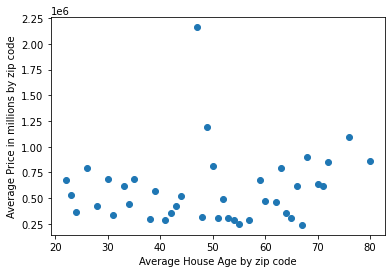

In [25]:
plt.scatter(ybz, pbz)
plt.xlabel('Average House Age by zip code')
plt.ylabel('Average Price in millions by zip code')

Text(0, 0.5, 'Average Price in millions by zip code')

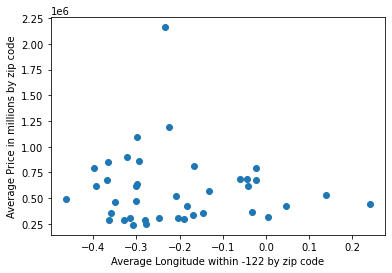

In [26]:
plt.scatter(lobz, pbz)
plt.xlabel('Average Longitude within -122 by zip code')
plt.ylabel('Average Price in millions by zip code')

# 4. How much is the average house over 1 acre and how many beds&baths does it have on average, how does this compare to the dataset as a whole?

Conclucion: The average house is $540,297 , has 3 beds and 2 baths, and is roughly 1/3 of an acre. The average house over 1 acre is also a 3 bed 2 bath but costs about 23.7 percent more on average. The average house over 2 acres is 675k which is only 
24.9 percent more than the 1/3 acre home

Reccomendation: if a big yard is important to you it is well worth the investment to buy a house on a 2  - 2.5 acre yard, provided you can afford it, as you can get 6 to 8 times as much property for only 25% more!

In [27]:
got_acres = df3.loc[df3['sqft_lot'] >= 43560]
print(f"The average house over 1 acre is ${round(np.mean(got_acres['price']))}")
print(f"The average house over 1 acre has {round(np.mean(got_acres['bedrooms']))} bedrooms and {round(np.mean(got_acres['bathrooms']))} bathrooms")

The average house over 1 acre is $668358
The average house over 1 acre has 3 bedrooms and 2 bathrooms


In [28]:
print(f"The average house is ${round(np.mean(df3['price']))}")
print(f"The average house has {round(np.mean(df3['bedrooms']))} bedrooms and {round(np.mean(df3['bathrooms']))} bathrooms")

The average house is $540297
The average house has 3 bedrooms and 2 bathrooms


In [29]:
print(f"The average house is {np.mean(df3['sqft_lot']) / 43560} acres")

The average house is 0.3466347282019282 acres


In [30]:
print(f"The average house over 2 acres is ${np.mean(df3.loc[df3['sqft_lot'] >= 43560*2]['price'])}")

The average house over 2 acres is $675002.0620300752


In [31]:
print(f"The average house over 1 acre costs {100*(round(np.mean(got_acres['price'])) / round(np.mean(df3['price']))-1)}% more than average.")

The average house over 1 acre costs 23.701963919844093% more than average.


In [32]:
print(f"The average house over 2 acres costs {100*(675002 / round(np.mean(df3['price']))-1)}% more than average.")

The average house over 2 acres costs 24.93165795849319% more than average.


Lattitude and Longitude are being used as location variable rather than zip code, b2b_ratio and yrs_ago have multicolinearity, and yr_sold has such little variance that it's not worth using. Although I didn't month sold could be created as a variable and used instead of year sold.

In [37]:
df4 = df3.drop(['zipcode', 'b2b_ratio', 'yr_sold', 'yrs_ago'], axis='columns')
df4.head()
data = df4.to_csv(r'C:\Users\aacjp\KC_Cleaned.csv', index=False)
data

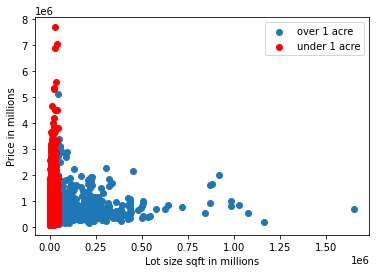

In [34]:
subset = df3.loc[df3['sqft_lot'] >= 43560]['sqft_lot']
subset_y = df3.loc[df3['sqft_lot'] >= 43560]['price']
under_1 = df3.loc[df3['sqft_lot'] <= 43560]['sqft_lot']
under1_y = df3.loc[df3['sqft_lot'] <= 43560]['price']
plt.scatter(subset, subset_y, label='over 1 acre')
plt.scatter(under_1, under1_y, color='red', label='under 1 acre')
plt.xlabel('Lot size sqft in millions')
plt.ylabel('Price in millions')
plt.legend()